# Assignment 2

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("building_inventory.csv")

In [4]:
df = pd.read_csv("building_inventory.csv", na_values = {
    "Year Acquired":0,
    "Year Constructed":0,
    "Congress Dist":0
})

In [5]:
plt.rcParams["figure.dpi"] = 130
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
plt.style.use('bmh')

# Relationship between the year acquired and the year constructed

Text(0.5, 1.0, 'Relationship between the year acquired and the year constructed')

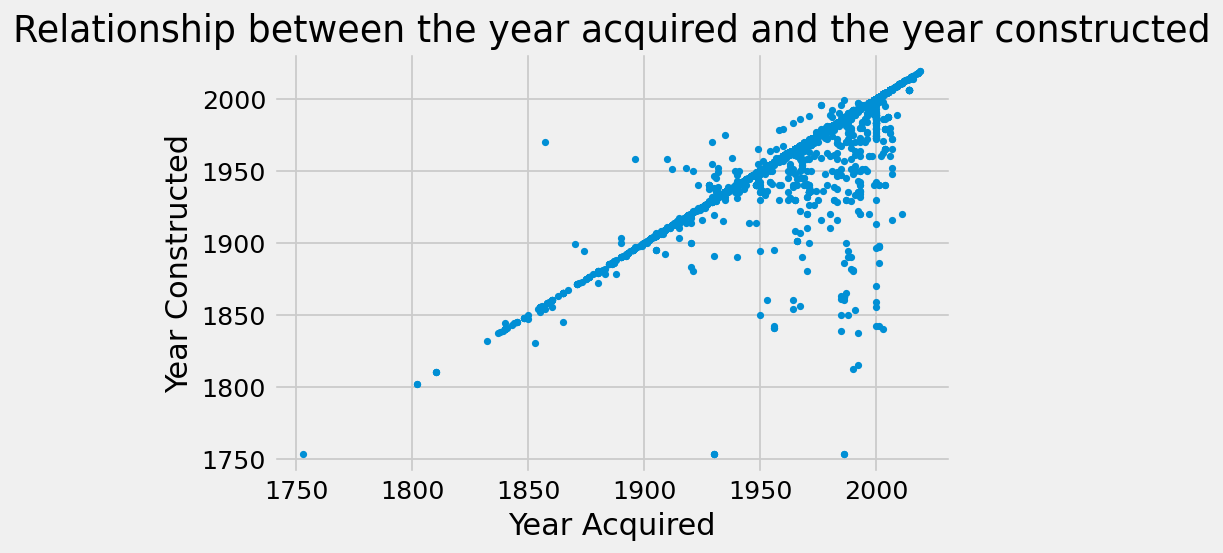

In [6]:
plt.plot(df["Year Acquired"],df["Year Constructed"],'.')
plt.xlabel("Year Acquired")
plt.ylabel("Year Constructed")
plt.title("Relationship between the year acquired and the year constructed")

All the Na values for the Year Acquired and Year Constructed were filtered out as these cannot contain null values.

The relation between the year acquired and the year constructed is quite clear from the above plotted scatter plot. There is a linear relationship between both the given entities which is one of the successes.

One of the very evident shortcoming is that all the points have overlapped which becomes very difficult to understand from a user perspective.


# Total square footage as a function of congressional district

In [7]:
df["Congress Dist"]

0       17.0
1       17.0
2       17.0
3       17.0
4       17.0
        ... 
8857    16.0
8858    16.0
8859    18.0
8860    16.0
8861    17.0
Name: Congress Dist, Length: 8862, dtype: float64

In [8]:
df["Square Footage"]

0         144
1         144
2         144
3         144
4         144
        ...  
8857      432
8858      330
8859      130
8860    49552
8861      288
Name: Square Footage, Length: 8862, dtype: int64

In [9]:
df_by_cong_dist = pd.DataFrame(df.groupby("Congress Dist").sum()["Square Footage"])
df_by_cong_dist.reset_index(inplace=True)
df_by_cong_dist

,Congress Dist,Square Footage
0,1.0,2351762
1,2.0,6285684
2,3.0,1293687
3,4.0,317741
4,5.0,1809022
5,6.0,145659
6,7.0,9211651
7,8.0,1461548
8,9.0,77978
9,10.0,929267


Text(0.5, 1.0, 'Total square footage as a function of congressional district')

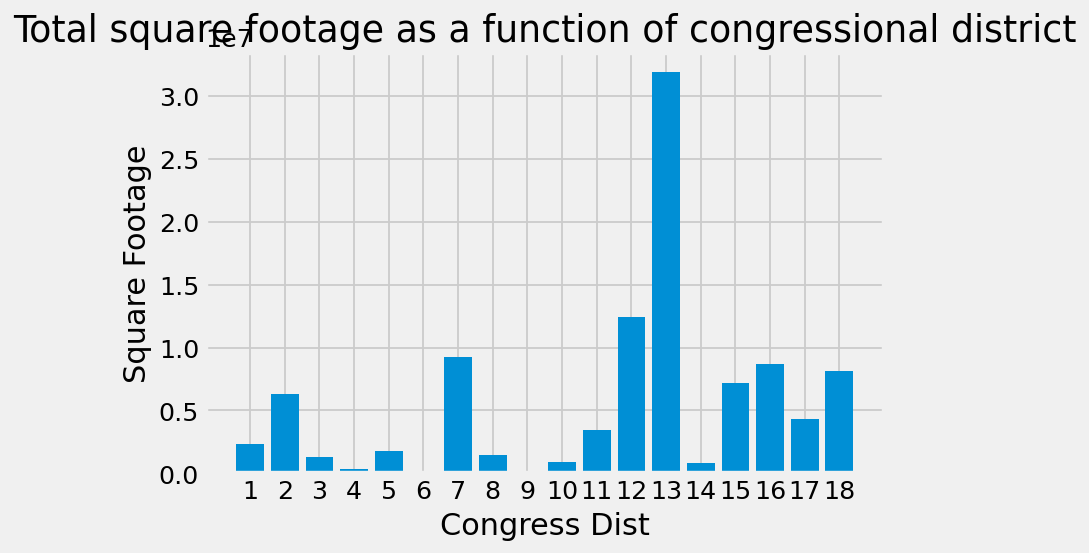

In [10]:
plt.bar(df_by_cong_dist["Congress Dist"],df_by_cong_dist["Square Footage"])
plt.xticks(ticks=np.linspace(1,18,18))
plt.ylabel("Square Footage")
plt.xlabel("Congress Dist")
plt.title("Total square footage as a function of congressional district")

In the above question we have to find out Total square footage as a function of congressional district so I have firstly created a data frame of Congress Dist by doing a group by and using the sum function to get the sum of all the data by using the below given command.
df_by_cong_dist = pd.DataFrame(df.groupby("Congress Dist").sum()["Square Footage"])

By using the reset_index command I have converted the original index to a column which is displayed in the above given output. After that, I have created a simple bar graph to display all the congress dist from 1 to 18 against the square footage.

One of the shortcomings in this approach is that the X-axis has some values to be displayed close to null but it is not actually null and has some value associated with it. For example, number 9 is not 0 but it seems through the graph that it is null.


# Average square footage per floor as a function of congressional district

In [11]:
df_by_cong_dist_avg = pd.DataFrame(df.groupby("Congress Dist").sum())
df_by_cong_dist_avg.reset_index(inplace=True)
df_by_cong_dist_avg

,Congress Dist,Zip code,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
0,1.0,2907765,1707,857,84942.0,86902.0,2351762,134,113,19
1,2.0,19313660,21128,10642,615955.0,617136.0,6285684,647,545,88
2,3.0,2177240,2433,1232,68995.0,70920.0,1293687,72,61,8
3,4.0,683919,80,40,17706.0,19719.0,317741,21,17,2
4,5.0,2789006,802,424,88641.0,90569.0,1809022,113,94,14
5,6.0,1570628,1137,581,51650.0,51650.0,145659,28,27,1
6,7.0,6652461,976,534,216263.0,216153.0,9211651,517,440,76
7,8.0,6444130,4739,2393,208055.0,208036.0,1461548,312,217,93
8,9.0,603189,309,159,17810.0,17810.0,77978,11,11,0
9,10.0,8303122,8352,4208,272016.0,271833.0,929267,213,206,7


In [12]:
df_by_cong_dist_avg["Avg SqFootage Per Floor"] = df_by_cong_dist_avg["Square Footage"]/df_by_cong_dist_avg["Total Floors"]

In [13]:
df_by_cong_dist_avg.head()

,Congress Dist,Zip code,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Avg SqFootage Per Floor
0,1.0,2907765,1707,857,84942.0,86902.0,2351762,134,113,19,17550.462687
1,2.0,19313660,21128,10642,615955.0,617136.0,6285684,647,545,88,9715.122102
2,3.0,2177240,2433,1232,68995.0,70920.0,1293687,72,61,8,17967.875000
3,4.0,683919,80,40,17706.0,19719.0,317741,21,17,2,15130.523810
4,5.0,2789006,802,424,88641.0,90569.0,1809022,113,94,14,16009.044248


Text(0.5, 1.0, 'Average square footage per floor as a function of congressional district')

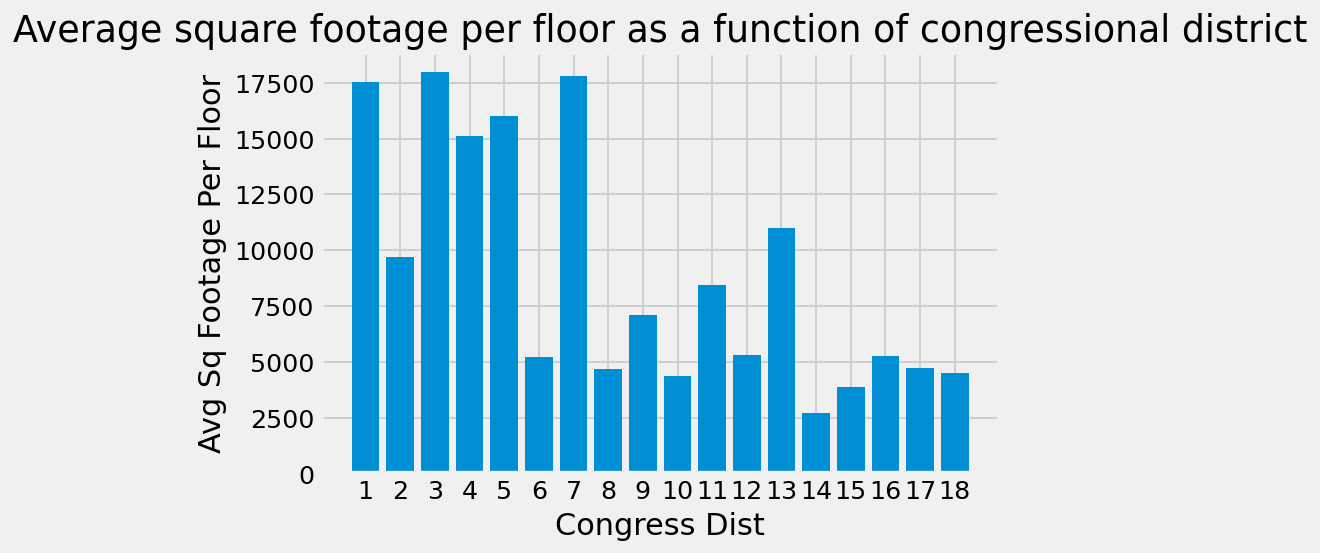

In [14]:
plt.bar(df_by_cong_dist_avg["Congress Dist"],df_by_cong_dist_avg["Avg SqFootage Per Floor"])
plt.xticks(ticks=np.linspace(1,18,18))
plt.ylabel("Avg Sq Footage Per Floor")
plt.xlabel("Congress Dist")
plt.title("Average square footage per floor as a function of congressional district")

The approach used for the above question was to first find out the average square footage per floor which was done by dividing the square footage by the total number of floors in the building to get the average square footage per floor.

The data obtained was then simply plot using a graph plot putting Congress Dist on the X axis and putting Avg Sq footage on the Y axis.

One of the shorcomings in this approach is that the data being displayed on the graph does not have the data mentioned properly and the user has to guess the value based on the grids that have been made.

All in all the visualization makes it very clear about the average sq footage per floor for all the different 18 congress districts.

# Square footage for the five most common departments as a function of year

In [15]:
df["Agency Name"].value_counts(sort=True)

Department of Natural Resources              3223
Department of Corrections                    1428
Department of Transportation                 1137
Department of Human Services                  617
University of Illinois                        525
Southern Illinois University                  420
Historic Preservation Agency                  284
Department of Military Affairs                231
Department of Agriculture                     228
Department of Juvenile Justice                120
Department of State Police                    109
Illinois State University                     102
Department of Veterans' Affairs                94
Northern Illinois University                   79
Department of Central Management Services      60
Western Illinois University                    42
Office of the Secretary of State               41
Eastern Illinois University                    35
Northeastern Illinois University               18
Chicago State University                       16


In [16]:
df_by_agency_name = pd.DataFrame(df.groupby(["Agency Name","Year Constructed"]).sum()["Square Footage"])
df_by_agency_name.reset_index(inplace=True)
df_by_agency_name

,Agency Name,Year Constructed,Square Footage
0,Appellate Court / Fifth District,1854.0,15124
1,Appellate Court / Fourth District,1922.0,16400
2,Appellate Court / Second District,1967.0,43330
3,Appellate Court / Third District,1858.0,15000
4,Appellate Court / Third District,1860.0,3700
...,...,...,...
1212,Western Illinois University,2007.0,9732
1213,Western Illinois University,2010.0,1200
1214,Western Illinois University,2012.0,60300
1215,Western Illinois University,2014.0,264870


In [17]:
df["Agency Name"].value_counts(sort=True)
most_cmn_dept = list(df["Agency Name"].value_counts(sort=True).keys()[0:5])
most_cmn_dept

['Department of Natural Resources',
 'Department of Corrections',
 'Department of Transportation',
 'Department of Human Services',
 'University of Illinois']

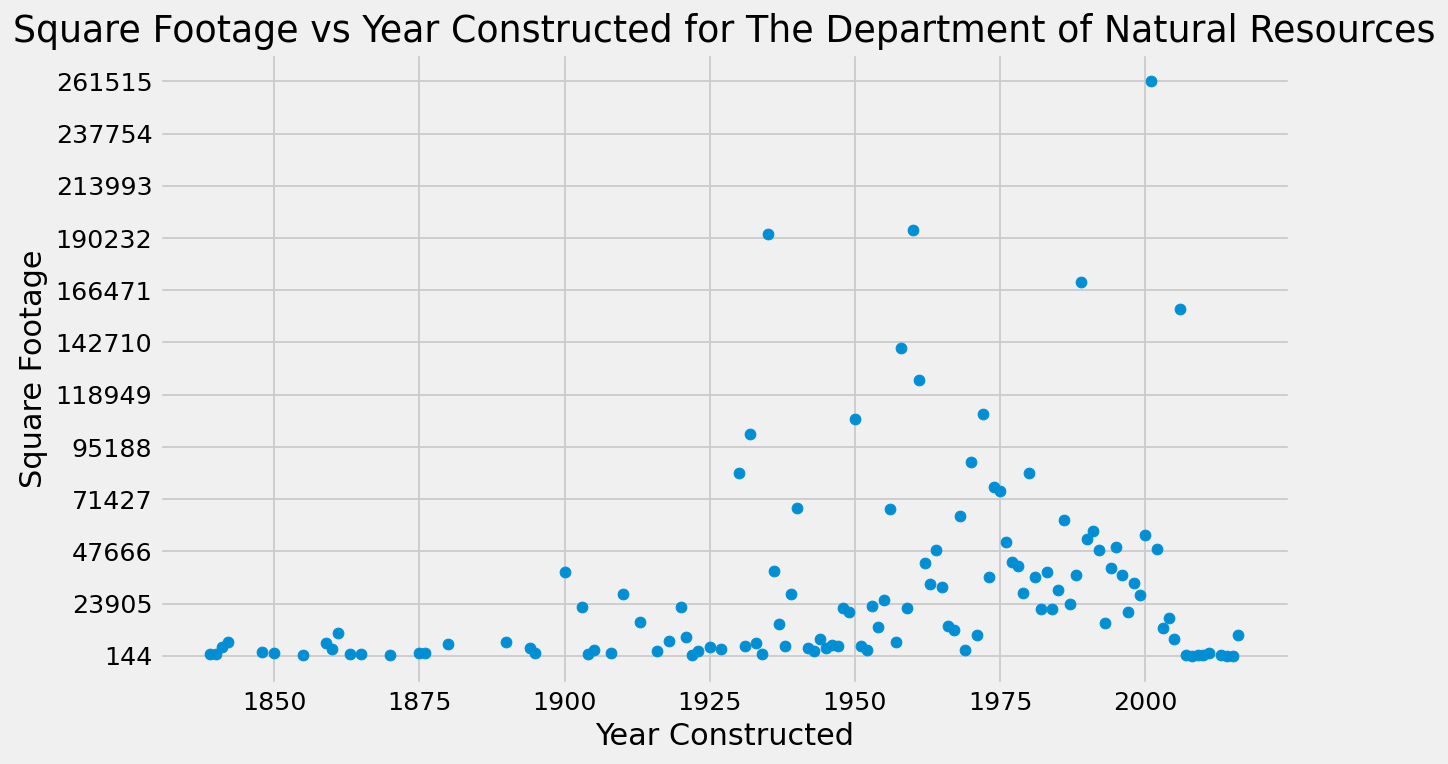

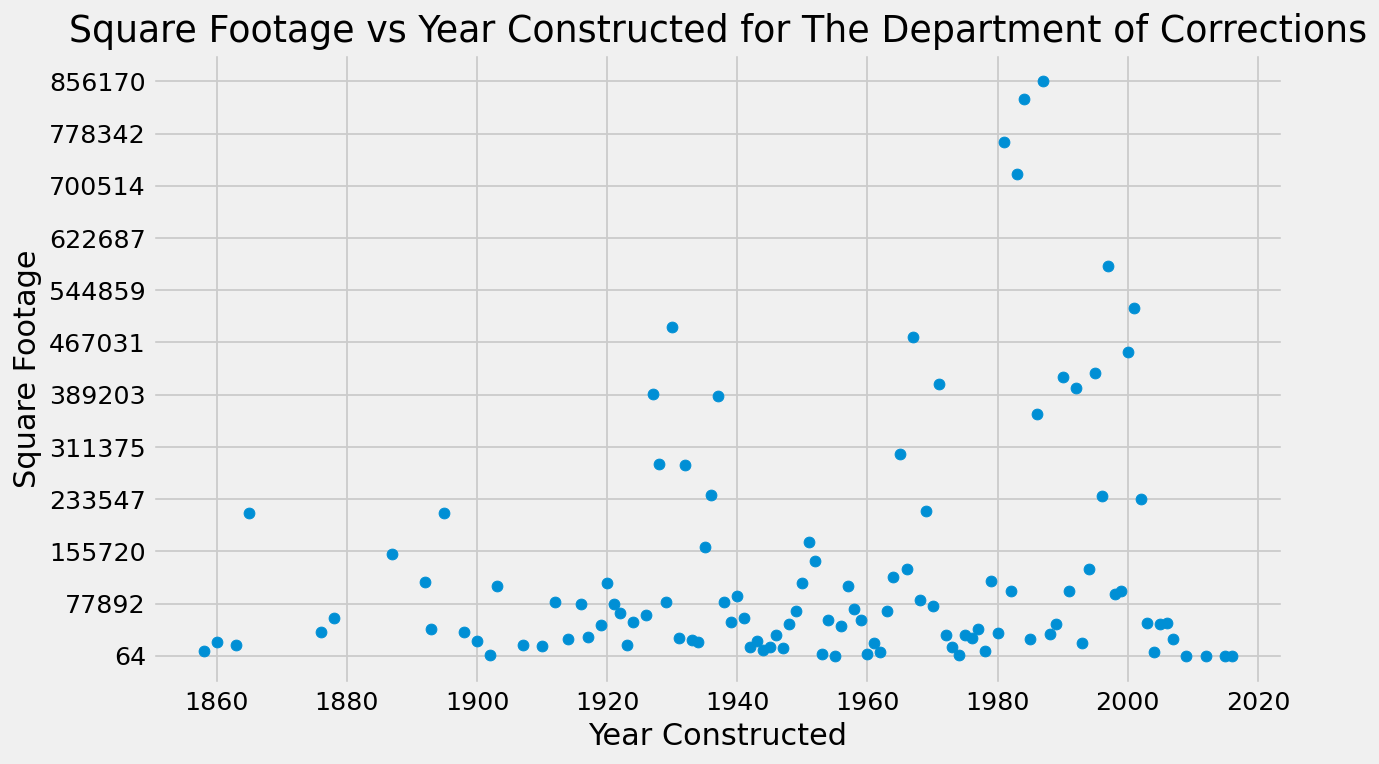

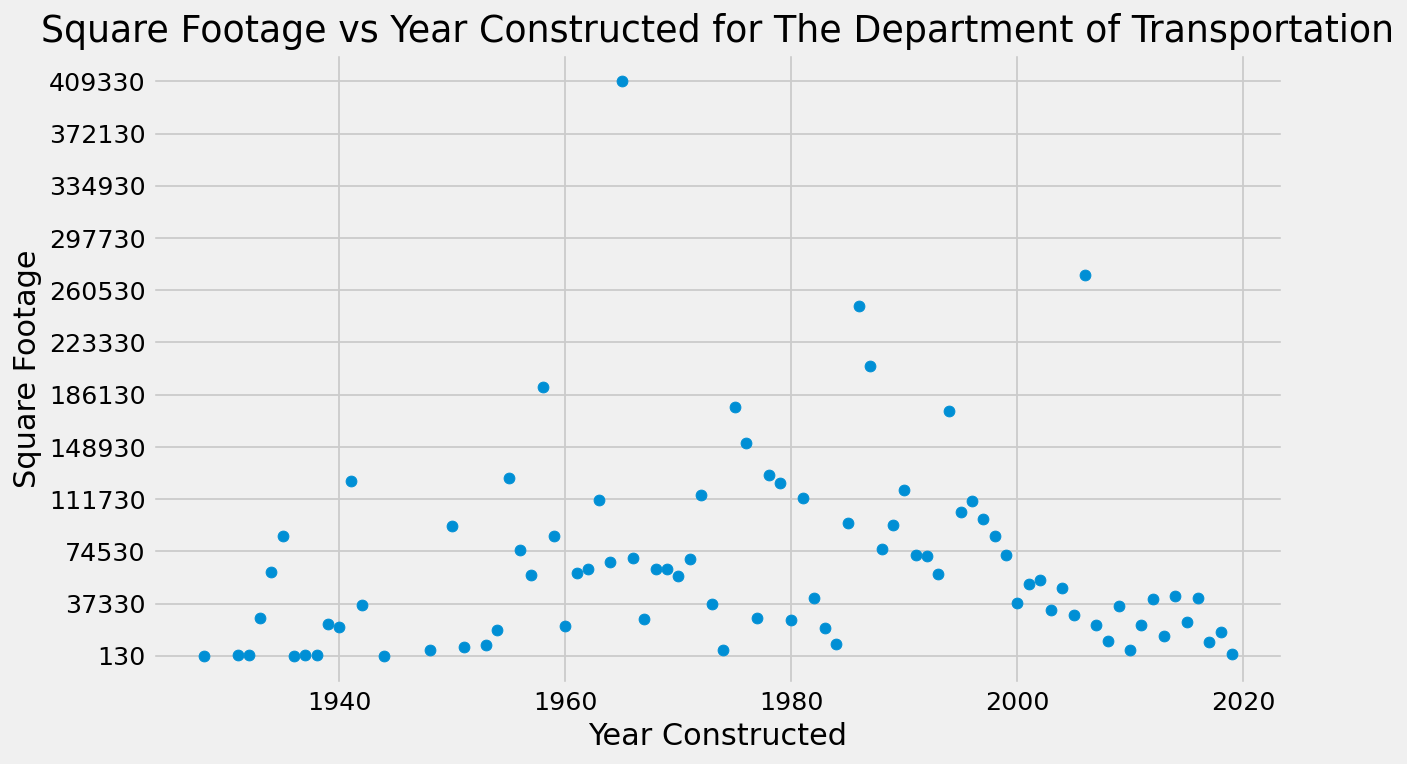

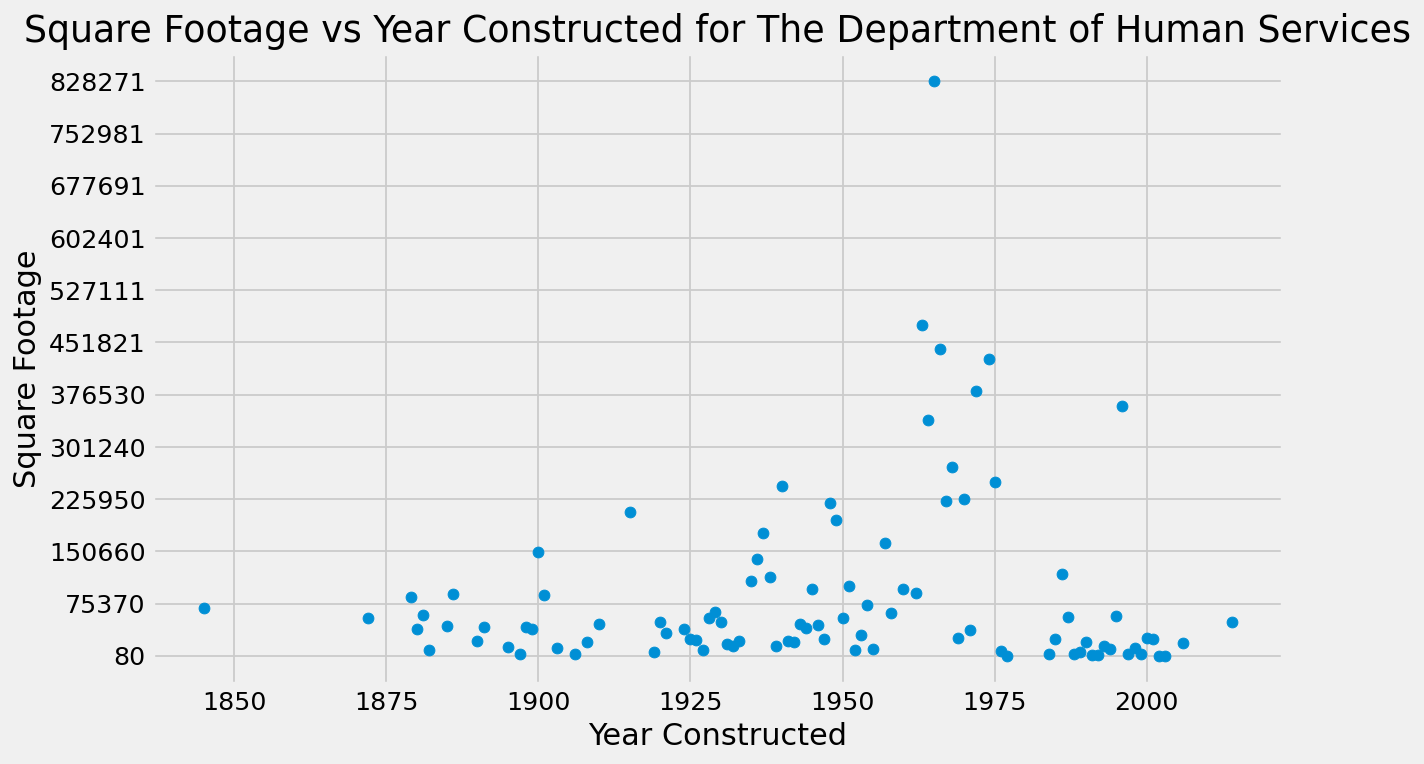

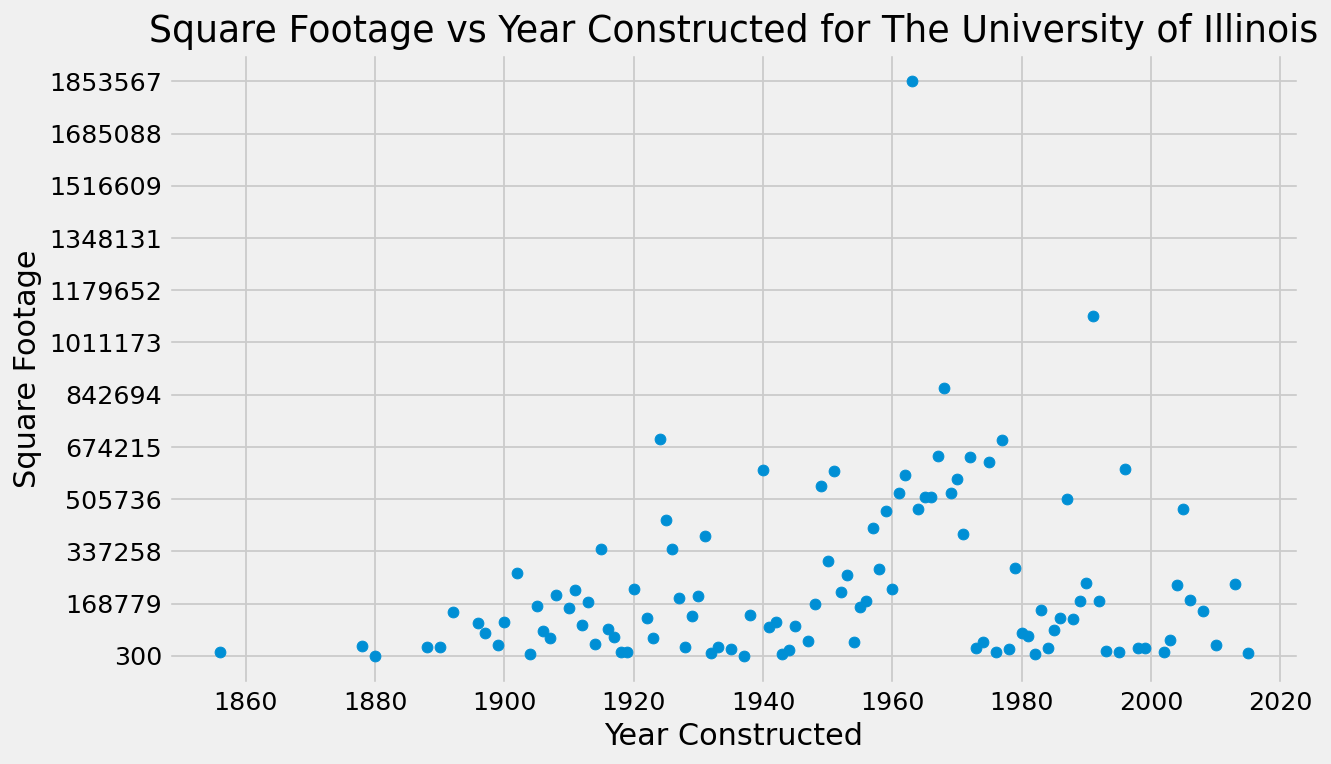

In [18]:
for x in most_cmn_dept:
    df_each = df_by_agency_name[df_by_agency_name['Agency Name'] == x]
    plt.figure(figsize=(10,6))
    sq_min = df_each["Square Footage"].min()
    sq_max = df_each["Square Footage"].max()
    plt.yticks(ticks=np.linspace(sq_min,sq_max,12))
    plt.scatter(df_each["Year Constructed"],df_each["Square Footage"])
    plt.title("Square Footage vs Year Constructed for The " +x)
    plt.ticklabel_format(style='plain')
    plt.xlabel("Year Constructed")
    plt.ylabel("Square Footage")

By applying value counts on the main data frame we were able to obtain the top 5 most popular departments in the university.

We then created a new data frame by applying group by to Agency Name and Year constructed. After that by applying reset index we converted the index to a column which can be used further for processing.

Finally, the most common departments were checked in the data frame and a scatter plot was created based on the data that we had for processing.

Also, every year has only one value associated with it. But through the scatter plot it becomes very difficult to identify the values on the lower side. The area constructed per year cannot be easily identified as there is overlapping of the dots on the scale.